# GRIP_TASK2_UNSUPERVISED_LEARNING

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# Load the iris dataset

In [7]:
iris_scan = datasets.load_iris()
df_iris = pd.DataFrame(iris_scan.data, columns = iris_scan.feature_names)
df_iris.head(50) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


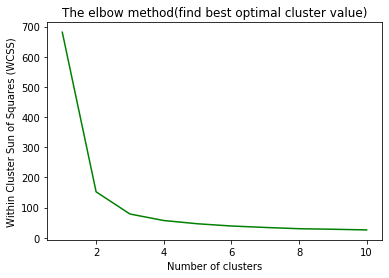

In [4]:
x = df_iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wc_sum_sq = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wc_sum_sq.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wc_sum_sq, color='green')
plt.title('The elbow method(find best optimal cluster value)')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sun of Squares (WCSS)') # Within cluster sum of squares
plt.show()

#  Applying kmeans to the dataset / Creating the kmeans classifier

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

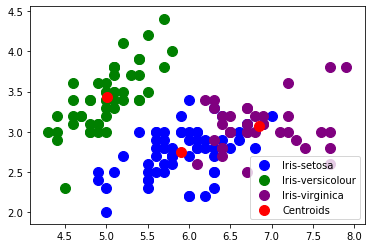

In [6]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()